# Regressionsrechnung

::::::{margin}
:::::{grid}
::::{grid-item-card}
:class-header: bg-light
5.2 Regression | Methode der kleinsten Quadrate (Statistik Grundlagen)

<iframe width="200" height="113" src="https://www.youtube.com/embed/lQU2tBGOgzo?si=tOTZxzwBWsZj8tsA" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>
::::
:::::
::::::

Bisher haben wir uns auf die Analyse von Messreihen konzentriert, bei denen einzelne Messwerte betrachtet wurden, um Mittelwerte und Standardabweichungen zu berechnen. Im letzten Kapitel haben wir jedoch bereits gesehen, dass es Situationen gibt, in denen verschiedene Messgrößen gemessen werden und diese unter Umständen eine Abhängigkeit oder Korrelation untereinander aufweisen können.

Dies bedeutet beispielsweise, dass wir eine Messgröße y haben, die eine Funktion einer anderen Messgröße x ist:

$$y = f(x)$$

Grundsätzlich ist jeder funktionale Zusammenhang $f(x)$ möglich. Es kann jedoch auch vorkommen, dass der Zusammenhang linear ist. In jedem Fall sollte der Typ der Fit-Funktion $y = f(x)$ im Voraus festgelegt und begründet werden. Es ist keine wissenschaftliche oder messtechnische Vorgehensweise, alle möglichen Funktionen ohne klaren Grund auszuprobieren und sich dann für die besten zu entscheiden. Dies könnte zu unbrauchbaren Näherungen oder sogar zu falschen und nicht wissenschaftlichen Ergebnissen führen, was vermieden werden sollte.

Wenn wir Messungen von y für verschiedene Werte von x durchführen, erhalten wir verschiedene Punkte im Messbereich. Die Werte werden wahrscheinlich um eine Gerade streuen, das heißt, sie liegen nicht perfekt auf einer Geraden. Dies liegt einfach daran, dass es zufällige Fehler gibt.

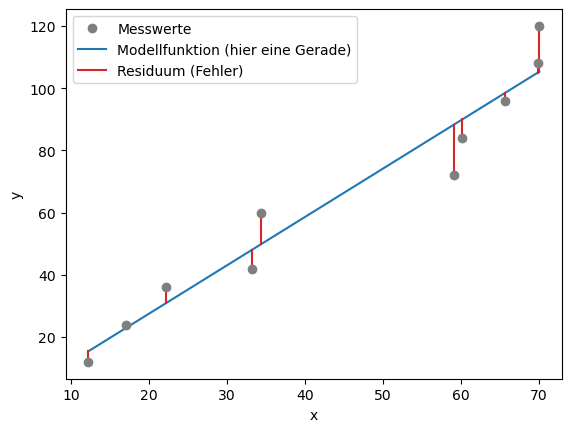

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import interpolate

y = [12, 24, 36, 42, 60, 72, 84, 96, 108, 120] 
x = [12.2, 17, 22.1, 33.2, 34.4, 59.1, 60.2, 65.7, 69.9, 70.1] 

y = np.array(y) #konvertiere die Messwerte in ein Numpy-Array
x = np.array(x) #konvertiere die Messwerte in ein Numpy-Array

plt.plot(x,y,'o', color='tab:gray', zorder=3)

# Anpassung / Fit:
def anpassung(x, a, b):
    return a + b*x
popt, pcov = curve_fit(anpassung, x, y)
plt.plot(x,anpassung(x,*popt), zorder=0, color = 'tab:blue')
plt.plot((x,x),([i for i in y], [j for (j) in anpassung(x,*popt)]),c='tab:red', zorder=1)
plt.xlabel('x')
plt.ylabel('y')
#plt.xticks([])
#plt.yticks([])
plt.legend(['Messwerte', 'Modellfunktion (hier eine Gerade)', 'Residuum (Fehler)'])
plt.show()

Um die optimale Gerade zu bestimmen, führen wir eine **lineare Regression** durch, um die Daten anzunähern. Die optimale Gerade hat im Idealfall die Form:

$$y = a + b \cdot x + E$$

Hierbei ist $b$ die Steigung der Geraden, $a$ der Achsenabschnitt und $E$ der Fehler, der durch den Abstand der Geraden von den Messpunkten entsteht.

Wie bestimmen wir diese Gerade? Kurz gesagt, suchen wir ein geeignetes Modell für unsere Daten und möchten die Modellparameter ermitteln. Das Modell soll möglichst gut die Messdaten vorhersagen. Die Anpassung des Modells erfolgt häufig mithilfe der Methode der kleinsten Quadrate, die sich für die Modellierung von nahezu allen Arten von Messdaten eignet.


:::{admonition} Tutorial
:class: tip
Python-Beispiele für Kurvenanpassungen findet ihr hier:
* [Vergleich verschiedener Fit-Routinen](T_LinReg)
* [Regression mit Fehlerbalken](T_FitmitFehlerbalken)
* [Klimadaten anpassen](T_Plotten)
:::

## Least-Squares: Methode der kleinsten Quadrate

Unser Ziel ist es, die Abweichung der Messwerte von der Geraden (oder allgemein von der Funktion $f$) so gering wie möglich zu halten. Wie bereits beim Berechnen von Mittelwerten und Standardabweichungen verwenden wir die Quadrate der Abweichungen. Dadurch werden positive und negative Abweichungen nicht ausgeglichen, und größere Abweichungen werden stärker (quadratisch) gewichtet.

Hierfür definieren wir die Funktion $Q$, die von den Geradenparametern $b$ und $a$ abhängt und als **Gütefunktion** definiert ist:

$$Q(b,a) = \sum_{i = 1}^N [y_i - (b\cdot x_i + a)]^2 = \mathrm{min !}$$

In dieser Funktion werden zunächst die Unterschiede zwischen den Messwerten und der theoretischen Geradenfunktion berechnet. Diese Differenzen werden dann quadriert und schließlich für alle Messwerte $y_i$ aufsummiert. Unser Ziel ist es, diese Summe zu minimieren.
Es handelt sich um ein *Minimierungsproblem*, das je nach Art der Modellfunktion unterschiedlich gelöst wird. Im Folgenden werden wir es für eine lineare Funktion lösen.

```{warning}
Besitzen die $N$ Messwerte $y_i$ jeweils unterschiedliche Unsicherheiten $s_i$, so werden diese in die Gütefunktion miteinbezogen und verursachen eine Art Gewichtung. Damit geht $Q$ über in $\chi^2$:
$$
\chi^2 = \sum_{i=1}^n \frac{(y_i - f(x_i))^2}{\sigma_i^2}
$$
Wenn alle Werte von $y_i$ die gleiche absolute (oder keine) Unsicherheit haben, ist $s_i = s = \mathrm{const}$ und beim "Nullsetzen" werden diese einfach eliminiert und man kann, wie im Folgenden gezeigt $Q$ benutzen.
```

Um die Parameter $a$ und $b$ zu minimieren, leiten wir die Funktion $Q$ nach diesen Parametern ab und setzen die Ableitungen gleich Null, um die Extremstellen (in diesem Fall das Minimum) zu finden. Wir leiten $Q$ also nach $b$ und $a$ ab:

$$\frac{dQ}{db} = -2 \sum_{i = 1}^{N} x_i (y_i - bx_i - a) = 0$$

$$\frac{dQ}{da} = -2 \sum_{i = 1}^{N} (y_i - bx_i - a) = 0$$

Durch Differentiation nach den Parametern und Gleichsetzen der Ableitungen auf Null erhalten wir die folgenden Gleichungen:

$$b\sum_{i = 1}^{N} x_i^2 + a\sum_{i = 1}^{N}x_i  = \sum_{i = 1}^{N}x_i y_i$$

$$b\sum_{i = 1}^{N} x_i + N a  = \sum_{i = 1}^{N} y_i$$

## Regressionskoeffizienten

Durch Umstellen dieser Gleichungen erhalten wir die folgenden Ausdrücke für die gesuchten besten Schätzwerte der Regressionsgeraden, auch **Regressionskoeffizienten** genannt:

$$ b = \frac{\sum_{i=1}^N (x_i y_i) - n\sum_{i=1}^N x_i }{\sum_{i=1}^N x_i^2 } = \frac{\mathrm{cov}_{xy}}{S_{x}^2} = \frac{\overline{x\cdot y} - \overline x \cdot \overline y}{\overline{x^2} - (\overline x)^2}$$

$$a = \frac{\sum_{i=1}^N y_i - b \sum_{i=1}^N x_i}{N} = \bar y - b \cdot \bar x$$

Hierbei bedeuten $\bar x$ und $\bar y$ die Durchschnittswerte der jeweiligen Messwerte:

$$\bar x = \frac{1}{N}\sum_{i = 1}^N x_i$$

$$\bar y = \frac{1}{N}\sum_{i = 1}^N y_i$$

und die Kovarianz $\mathrm{cov}_{xy}$ und die Standardabweichung $S_{x}$ der Messwerte sind:

$$\mathrm{cov}_{xy} = \frac{1}{N-1}\sum_{i = 1}^N (x_i-\bar x)(y_i - \bar y)$$

$$S_{x}^2 = \frac{1}{N-1}\sum_{i = 1}^N (x_i-\bar x)^2$$

Es ist wichtig anzumerken, dass wir hier die Mittelwerte für $x$ und $y$ verwenden, obwohl die $x$-Werte absichtlich während der Versuchsreihe variiert werden, wodurch sich die Größen $x$ und $y$ kontinuierlich ändern. Dies ist eine besondere Eigenschaft der Methode der kleinsten Quadrate in der linearen Regression.

Mittels diesen Gleichungen können wir für das oben gezeigte Beispiel der Messdaten die Parameter $a$ und $b$ manuell berechnen:

In [119]:
# Erstellen der DataFrames
data = pd.DataFrame({'x': x, 'y': y})

# Berechnung der Regressionskoeffizienten
x_mean = data['x'].mean()
y_mean = data['y'].mean()
xy_mean = (data['x'] * data['y']).mean()
x_squared_mean = (data['x']**2).mean()

b = (xy_mean - x_mean * y_mean) / (x_squared_mean - x_mean**2)
a = y_mean - b * x_mean

print("Regressionskoeffizient b (Geraden-Steigung):", b)
print("Regressionskoeffizient a (Ordinatenabschnitt):", a)

# Berechnung der Gütefunktion
data['b*x+a'] = b * data['x'] + a
data['y-(b*x+a)'] = data['y'] - data['b*x+a']
data['[y-(b*x+a)]^2'] = data['y-(b*x+a)']**2
sum_of_squared_residuals = data['[y-(b*x+a)]^2'].sum()



Regressionskoeffizient b (Geraden-Steigung): 1.5521057004878616
Regressionskoeffizient a (Ordinatenabschnitt): -3.4979720446561657


In [120]:
display(data)
print("Summe der quadrierten Abweichungen (Gütefunktion):", sum_of_squared_residuals)

,x,y,b*x+a,y-(b*x+a),[y-(b*x+a)]^2
0,12.2,12,15.437718,-3.437718,11.817902
1,17.0,24,22.887825,1.112175,1.236934
2,22.1,36,30.803564,5.196436,27.002948
3,33.2,42,48.031937,-6.031937,36.384267
4,34.4,60,49.894464,10.105536,102.121857
5,59.1,72,88.231475,-16.231475,263.460776
6,60.2,84,89.938791,-5.938791,35.269240
7,65.7,96,98.475372,-2.475372,6.127469
8,69.9,108,104.994216,3.005784,9.034735
9,70.1,120,105.304638,14.695362,215.953677


Summe der quadrierten Abweichungen (Gütefunktion): 708.4098032924456


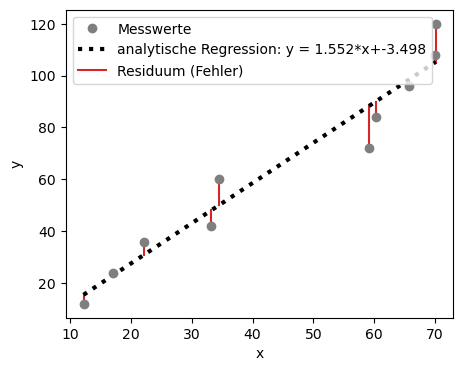

In [121]:
# MatplotLib Settings:
plt.style.use('default') # Matplotlib Style wählen
plt.rcParams['font.size'] = 10; # Schriftgröße

plt.figure(figsize=(5,4)) # Plot-Größe
plt.plot(x,y,'o', color='tab:gray', zorder=3)
plt.plot(x,b*x+a,lw=3, color="black", ls = ':')  # plot Ausgleichsgerade mit m und b
plt.plot((x,x),([i for i in y], [j for (j) in anpassung(x,*popt)]),c='tab:red', zorder=1)
plt.xlabel('x')
plt.ylabel('y')
#plt.xticks([])
#plt.yticks([])
plt.legend(['Messwerte', 'analytische Regression: y = %5.3f*x+%5.3f'%(b,a), 'Residuum (Fehler)'])
plt.show()

Die Regressionskoeffizienten ermöglichen uns, die Gerade zu bestimmen. In der Praxis verwendet man jedoch in der Regel nicht diese komplexen Berechnungen, sondern greift auf Funktionen zurück, die bereits in vielen Programmen vorimplementiert sind. Ein Beispiel hierfür ist die in Python vorhandene Funktion `curve_fit`. Wie das folgende Beispiel zeigt, führen sowohl die manuelle Berechnung von $b$ und $a$ als auch die Verwendung der integrierten Python-Funktion zu derselben Regressionsgeraden:

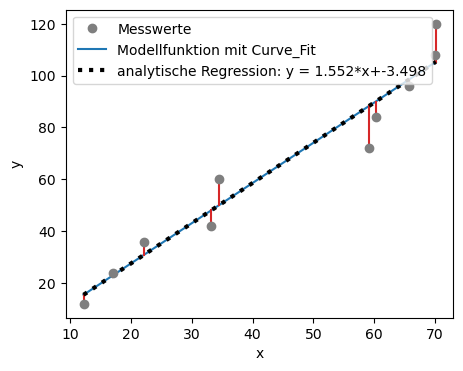

In [122]:
plt.style.use('default') # Matplotlib Style wählen
plt.rcParams['font.size'] = 10; # Schriftgröße
plt.figure(figsize=(5,4)) # Plot-Größe
plt.plot(x,y,'o', color='tab:gray', zorder=3, label = 'Messwerte')
plt.plot(x,anpassung(x,*popt), zorder=0, color = 'tab:blue', label = 'Modellfunktion mit Curve_Fit')
plt.plot(x,b*x+a,lw=3, color="black", ls = ':', label = 'analytische Regression: y = %5.3f*x+%5.3f' %(b,a))  # plot Ausgleichsgerade mit m und b
plt.plot((x,x),([i for i in y], [j for (j) in anpassung(x,*popt)]),c='tab:red', zorder=1)
plt.xlabel('x')
plt.ylabel('y')
#plt.xticks([])
#plt.yticks([])
plt.legend()
plt.show()


## Fehler- und Residuenanalyse

Ein wichtiges Maß zur Bewertung der Anpassungsgüte eines Modells sind die **Residuen**.  
Residuen sind definiert als die Differenz zwischen den gemessenen Werten und den durch das Modell vorhergesagten Werten:

$$
\varepsilon_i = y_i - f(x_i)
$$

- Wenn das Modell korrekt ist und die Unsicherheiten realistisch abgeschätzt wurden, sollten die Residuen zufällig um 0 verteilt sein.  
- **Systematische Strukturen** in den Residuen (z. B. Trends oder gekrümmte Muster) deuten darauf hin, dass das Modell die Daten nicht angemessen beschreibt.  
- Residuenplots sind daher ein wichtiges Diagnosewerkzeug bei der Datenanalyse.

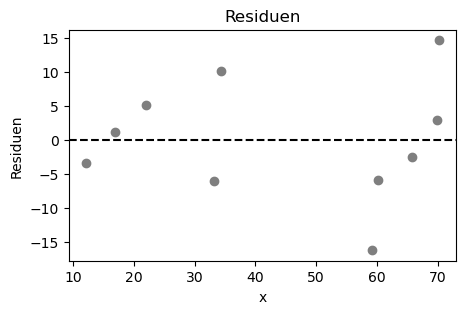

In [123]:
# MatplotLib Settings:
plt.style.use('default') # Matplotlib Style wählen
plt.rcParams['font.size'] = 10; # Schriftgröße
plt.figure(figsize=(5,3)) # Plot-Größe

# Residuen berechnen
residuals = y - anpassung(x, *popt)

# Residuenplot
plt.axhline(0, color="black", linestyle="--")
plt.scatter(x, residuals, color = 'tab:gray')
plt.xlabel("x")
plt.ylabel("Residuen")
plt.title("Residuen")
plt.show()

### Standardfehler der Residuen

Als ein Maß für die **Qualität der Regression** kann der geschätzte Standardfehler der Residuen (engl. *residual standard error*) genommen werden. 
Er beschreibt, wie stark die Messwerte im Durchschnitt von der Regressionsgeraden abweichen:

$$
s_y = \sqrt{\frac{1}{N-2}\sum_{i=1}^n {\varepsilon}_i^2} = \sqrt{\frac{SQR}{N-2}}
$$

mit  
- ${\varepsilon}_i$: Residuen  
- $N-2$: Freiheitsgrade (wegen Schätzung von zwei Parametern $a, b$)  
- SQR: Quadratsumme der Residuen

Der Standardfehler der Residuen ist ein **eigenständiges Gütemaß**. Er gibt an, wie groß im Durchschnitt die Abweichung der Messwerte von der Regressionsgerade ausfällt. Je größer der Standardfehler der Regression, desto schlechter beschreibt die Regressionsgerade die Verteilung der Messwerte.

Der Standardfehler beträgt:  9.410166067161393


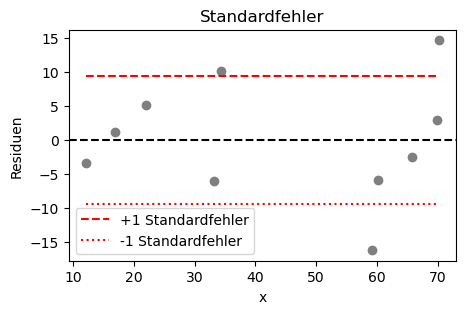

In [124]:
# MatplotLib Settings:
plt.style.use('default') # Matplotlib Style wählen
plt.rcParams['font.size'] = 10; # Schriftgröße
plt.figure(figsize=(5,3)) # Plot-Größe

# Residuen berechnen
residuals = y - anpassung(x, *popt)
summed_res_quadrat = np.sum(residuals**2)
sy = np.sqrt(summed_res_quadrat/(len(y)-2)) # Standardfehler der Schätzung

print('Der Standardfehler beträgt: ', sy)

# Residuenplot
plt.axhline(0, color="black", linestyle="--")
plt.scatter(x, residuals, color = 'tab:gray')
plt.hlines(sy, min(x), max(x), colors='red', linestyles='dashed', label='+1 Standardfehler')
plt.hlines(-sy, min(x), max(x), colors='red', linestyles=':', label='-1 Standardfehler')
plt.legend()
plt.xlabel("x")
plt.ylabel("Residuen")
plt.title("Standardfehler")
plt.show()

### Bestimmtheitsmaß und Korrelation

::::::{margin}
:::::{grid}
::::{grid-item-card}
:class-header: bg-light
Bestimmtheitsmaß Regression berechnen & interpretieren 📚 einfach erklärt [Theorie/Formel] (Alles Andy)

<iframe width="200" height="113" src="https://www.youtube.com/embed/3JR95ubOuL4?si=SpqKGVuZUWvKJBvS" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>
::::
:::::
::::::

Das Bestimmtheitsmaß $R^2$ ist ein Maß für die **Anpassungsgüte** eines Regressionsmodells.  

$$
R^2 = 1 - \frac{SQR}{SQT} = 1-\frac{\displaystyle\sum_i \left(y_i - f({x}_i)\right)^2}{\displaystyle\sum_i \left(y_i - \overline{y}\right)^2}
$$

- SQR: Quadratsumme der Residuen  
- SQT: gesamte Quadratsumme (Variation der Daten um den Mittelwert) 

Das Bestimmtheitsmaß ist gleich dem Korrelationskoeffizienten:

 $$\mathit{R}^2 = r^2 (= \textrm{Korrelation}^2)$$

 mit 

 $$r = \frac{\overline{x\cdot y} - \overline x \cdot \overline y}{\sqrt{\overline{x^2} - (\overline x)^2} \cdot {\sqrt{\overline{y^2} - (\overline y)^2}}} $$  


Da der Korrelationskoeffizient lediglich angibt, wie stark die Messwerte um einen linearen Zusammenhang streuen, ist auch das Bestimmtheitsmaß nur für lineare Regressionen definiert. Das Bestimmtheitsmaß kann mit 100 multipliziert werden, um es in Prozent auszudrücken. Dies entspricht dem prozentualen Anteil der Streuung in $y$, der durch das lineare Modell beschrieben wird, und liegt zwischen 0% und 100%:

- 0%: Es existiert kein linearer Zusammenhang.
- 100%: Perfekter linearer Zusammenhang.

Allgemein gilt für das **Bestimmtheitsmaß**:

- Je näher $\mathit{R}^2$ an 1 liegt, desto besser passt die Kurvenanpassung.
- Für $\mathit{R}^2 = 0$ ist das Modell völlig ungeeignet, um einen Zusammenhang zwischen $x_i$ und $y_i$ vorherzusagen.
- Für $\mathit{R}^2 = 1$ kann $y$ vollständig durch das lineare Modell beschrieben werden, und alle Messpunkte liegen auf einer nicht-horizontalen Geraden. In diesem Fall besteht ein deterministischer Zusammenhang, kein stochastischer.

**Nachteile des Bestimmtheitsmaßes:**

Bei einer steigenden Anzahl von Messwerten erhöht sich $\mathit{R}^2$, ohne dass die Korrelation oder die Regression tatsächlich besser wird. Dieses Problem könnte durch ein korrigiertes $\mathit{R}^2$ behoben werden:

$$\mathit{\overline R}^2 = 1 - (1 - \mathit{R}^2) \cdot \frac{n-1}{n-p-1}$$

Dabei stehen:
- $n$ für die Anzahl der Messwerte und
- $p$ für die Anzahl der Variablen im Regressionsmodell.

Ein weiterer Nachteil ist, dass das Bestimmtheitsmaß keine Aussage darüber trifft, ob das verwendete Regressionsmodell tatsächlich korrekt ist.
    
  


In [125]:
# Analytische Methode:
r = (np.mean(x*y)-np.mean(x)*np.mean(y))/(np.sqrt(np.mean(x**2) - np.mean(x)**2) * np.sqrt(np.mean(y**2) - np.mean(y)**2))
print('Der Korrelationskoeffizient zwischen x und t beträgt: %5.8f\n'%(r))

# Python:
r = np.corrcoef(x, y)
print('Die Korrelationsmatrix zwischen x und t mittels numpy-Paket lautet:')
print(r)

Der Korrelationskoeffizient zwischen x und t beträgt: 0.97035603

Die Korrelationsmatrix zwischen x und t mittels numpy-Paket lautet:
[[1.         0.97035603]
 [0.97035603 1.        ]]


### Chi²-Quadrat-Anpassungstest

Die Anpassungsgüte eines Modells wird quantitativ mit der **Chi-Quadrat-Test** bewertet.  
Dabei wird die folgende Testgröße berechnet, bei der die Residuen durch die Unsicherheiten der Messwerte $s_i$ geteilt werden (um eine Normierung zu erhalten) und schließend quadratriert aufsummiert werden. 

$$\chi^2 = \sum_{i=1}^N \left(\frac{f(x_i)-y_i}{s_i}\right)^2$$

$y_i$ sind die gemessenen Werte sind, $f(x_i)$ die Modellwerte und $s_i$ die geschätzte Unsicherheit der Messwerte. Diese Größe $\chi^2$, oder $Q$, haben wir bereits als Gütefunktion für die Least-Square-Methode oben kennengelernt. 

Zur Beurteilung eines Modells wird das **reduzierte Chi²** verwendet:

$$
\chi^2_\nu = \frac{\chi^2}{N-k}
$$

wobei $k$ die Anzahl der Modellparameter ist und $N$ die Anzahl der Messwerte. Für die lineare Regression, mit zwei Modellparametern $b$ and $a$, ist $k = 2$.


Die Chi-Quadrat-Test ermöglicht es, die Anpassungsgüte eines vermuteten funktionalen Zusammenhangs (z. B. Abhängigkeit einer Messgröße von Zeit, Temperatur oder Druck) an empirische Messpunkte zu bewerten.

Praktisch bedeutet das:
* Man prüft, ob ein gewähltes Modell (etwa eine Gerade) die Daten hinreichend beschreibt oder ob ein komplexeres Modell (z. B. Parabel, logarithmischer Zusammenhang) notwendig ist.
* Dazu vergleicht man die berechneten $\chi^2$-Werte verschiedener Modelle. Das Modell mit dem kleinsten normierten $\chi^2$ (reduzierten $\chi^2$) liefert die beste Erklärung der Daten.

    - $\chi^2_\nu \approx 1$: Modell passt zu den Daten, Unsicherheiten sind realistisch.  
    - $\chi^2_\nu \gg 1$: Modell passt schlecht oder Unsicherheiten unterschätzt.  
    - $\chi^2_\nu \ll 1$: Unsicherheiten überschätzt oder Daten überangepasst.  

Die Chi-Quadrat-Test quantifiziert somit die zufälligen Abweichungen zwischen Modell und Daten und stellt eine objektive Grundlage zur Auswahl zwischen konkurrierenden Erklärungsmodellen bereit.

Darüber hinaus erlaubt sie, auf Basis der empirisch bestimmten Varianz, Vertrauensintervalle für die (unbekannte) Varianz der Grundgesamtheit abzuschätzen. Damit lässt sich mit einer vorgegebenen Wahrscheinlichkeit der Bereich angeben, in dem der wahre Wert der Varianz liegt.

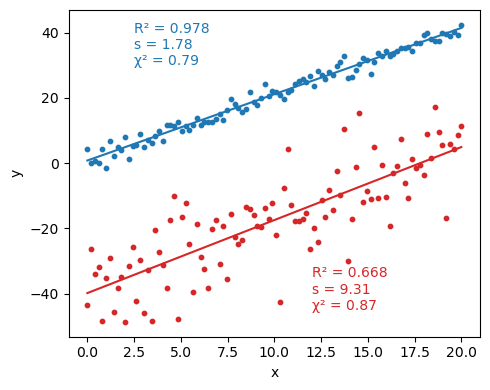

In [126]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

# MatplotLib Settings:
plt.style.use('default')
plt.rcParams['font.size'] = 10
plt.figure(figsize=(5,4))

# --- Lineares Modell ---
def linear(x, a, b):
    return a * x + b

# --- Daten erzeugen ---
np.random.seed(1)
x1 = np.linspace(0, 20, 100)
n = len(x1)
dof = n - 2  # Freiheitsgrade bei linearer Regression

# Datensatz 1: geringes Rauschen (blau, oben)
noise1 = 2.0
y1 = 2.0 * x1 + 1.0 + np.random.normal(0, noise1, size=n)
params1, _ = curve_fit(linear, x1, y1)
a1, b1 = params1
y1_fit = linear(x1, a1, b1)
R2_1 = r2_score(y1, y1_fit)

# Standardfehler der Residuen
resid1 = y1 - y1_fit
sigma1 = np.sqrt(np.sum(resid1**2) / dof)

# Chi² und reduziertes Chi²
chi2_1 = np.sum((resid1 / noise1) ** 2)
chi2_red_1 = chi2_1 / dof

# Datensatz 2: starkes Rauschen (rot, unten, Offset)
noise2 = 10.0
y2 = 2.0 * x1 + 1.0 + np.random.normal(0, noise2, size=n) - 40
params2, _ = curve_fit(linear, x1, y2)
a2, b2 = params2
y2_fit = linear(x1, a2, b2)
R2_2 = r2_score(y2, y2_fit)

# Standardfehler der Residuen
resid2 = y2 - y2_fit
sigma2 = np.sqrt(np.sum(resid2**2) / dof)

# Chi² und reduziertes Chi²
chi2_2 = np.sum((resid2 / noise2) ** 2)
chi2_red_2 = chi2_2 / dof

# --- Plot ---
plt.scatter(x1, y1, color='tab:blue', s=10)
plt.plot(x1, y1_fit, "-", color='tab:blue')
plt.scatter(x1, y2, color='tab:red', s=10)
plt.plot(x1, y2_fit, "-", color='tab:red')

# Texte mit R², Standardfehler und Chi²
plt.text(2.5, 30, 
         f"R² = {R2_1:.3f}\ns = {sigma1:.2f}\nχ² = {chi2_red_1:.2f}", 
         color="tab:blue")

plt.text(12, -45, 
         f"R² = {R2_2:.3f}\ns = {sigma2:.2f}\nχ² = {chi2_red_2:.2f}", 
         color="tab:red")

plt.xlabel("x")
plt.ylabel("y")
plt.tight_layout()
plt.show()

### Unsicherheiten der Regressionskoeffizienten

Natürlich kann man auch die Abweichungen, Toleranzen und Vertrauensintervalle für die Regressionskoeffizienten $b$ und $a$ betrachten.

Der Fehler der Geradensteigung $b$ beträgt:

$$
\begin{align*}
s_b &= s_y \cdot \sqrt{\frac{N}{N\cdot \sum x_i^2 - \left(\sum x_i\right)^2}} = s_y \cdot \sqrt{\frac{1}{\sum x_i^2 - N\cdot \bar x^2}} \\
& = s_y \cdot \sqrt{\frac{1}{\sum \left(x_i - \bar x \right)^2}} = s_y \cdot \sqrt{\frac{1}{N\cdot (\overline{x^2} - (\overline x)^2)}}
\end{align*}$$

Der Fehler des Ordinatenabschnitts $a$ beträgt:

$$
\begin{align*}
s_a &= s_y \cdot \sqrt{\frac{\sum x_i^2}{N\cdot \sum x_i^2 - \left(\sum x_i\right)^2}} = s_y \cdot \sqrt{\frac{1}{N}\frac{\sum x_i^2}{\sum x_i^2 - N\cdot \bar x^2}} \\
& = s_y \cdot \sqrt{\frac{1}{N}\frac{\sum x_i^2}{\sum \left(x_i - \bar x \right)^2}} = s_b \cdot \sqrt{\overline{x^2}}
\end{align*}$$

Mithilfe dieser Standardabweichungen für $a$ und $b$ können mit der Student-t-Verteilung und Quantilen kombiniert werden, um den Vertrauensbereich anzugeben.

In [130]:
N = len(y)
diff_y = 0
for i in range(N):
    diff_y += ( y[i] - b * x[i] - a )**2

streuung_y = 1/(N-2)*diff_y
s_y = np.sqrt(streuung_y)
print('Die Unsicherheit von y ist \t s_y = %5.4f' %(s_y))

s_b = s_y * np.sqrt(1 / (N*(np.mean(x**2) - np.mean(x)**2)))
print('Die Unsicherheit von b ist \t s_b = %5.4f' %(s_b))

s_a = s_b * np.sqrt(np.mean(x**2))
print('Die Unsicherheit von a ist \t s_a = %5.4f' %(s_a))


Die Unsicherheit von y ist 	 s_y = 9.4102
Die Unsicherheit von b ist 	 s_b = 0.1367
Die Unsicherheit von a ist 	 s_a = 6.7574
6.757445712176623
0.13667391664245576


### Kovarianz 

Bei einer Anpassung in Python oder Matlab wird neben den Fitparametern auch die **Kovarianzmatrix** zurückgegeben.  
Die Kovarianzmatrix enthält auf der **Diagonalen** direkt die geschätzten Varianzen der einzelnen Parameter, deren Quadratwurzeln die **Standardunsicherheiten** (Fehlerbalken der Parameter) ergeben und somit nicht manuell, wie eben, berechnet werden müssen. 

Die **Kovarianz** 

$$
\mathrm{cov}(X, Y) = \mathbb{E}[(X - \mu_X)(Y - \mu_Y)]
$$

beschreibt, ganz allgemein, wie zwei Größen gemeinsam variieren.  
- Ist die Kovarianz **positiv**, steigen beide Größen meist gemeinsam an.  
- Ist sie **negativ**, steigt die eine, wenn die andere fällt.  
- Kovarianz = 0 bedeutet, dass keine lineare Abhängigkeit erkennbar ist.  

Aus der Kovarianz lässt sich die bereits bekannte Korrelation $r$ berechnen, die eine normierte Form der Kovarianz ist: 

$$
r_{XY} = \frac{\mathrm{cov}(X, Y)}{s_X \, s_Y}
$$

- $r_{XY} = 1$: perfekter positiver linearer Zusammenhang  
- $r_{XY} = -1$: perfekter negativer linearer Zusammenhang  
- $r_{XY} = 0$: kein linearer Zusammenhang  

In Matrixschreibweise erhält man aus der Kovarianzmatrix $\Sigma$ die **Korrelationsmatrix** $R$, indem jede Kovarianz durch das Produkt der Standardabweichungen normiert wird:

$$
R_{ij} = \frac{\Sigma_{ij}}{\sqrt{\Sigma_{ii}\,\Sigma_{jj}}}
$$


Die **Kovarianzmatrix** fasst die Varianzen und Kovarianzen mehrerer Parameter zusammen.  
- Die **Diagonalelemente** sind die Varianzen $\sigma_i^2$, bzw. $s_i^2$ der einzelnen Parameter.  
- Die **Nebendiagonalen** enthalten die Kovarianzen $\mathrm{cov}(p_i, p_j)$. Diese beschreiben die Kovarianzen *zwischen* Parametern (wie stark ihre Unsicherheiten miteinander korrelieren).  
Eine hohe Kovarianz deutet darauf hin, dass die Parameter nicht unabhängig voneinander bestimmt sind.

In [134]:

print('Wurzel aus Kovarianzmatrix-Eintrag von a: s_a = ', np.sqrt(pcov[0][0]))
print('Wurzel aus Kovarianzmatrix-Eintrag von b: s_b = ', np.sqrt(pcov[1][1]))


Wurzel aus Kovarianzmatrix-Eintrag von a: s_a =  6.757445712176623
Wurzel aus Kovarianzmatrix-Eintrag von b: s_b =  0.13667391664245576


## Erweiterung auf allgemeine Funktionen

Die Methode der kleinsten Quadrate kann auf jede Funktion angewendet werden, sei es beispielsweise eine Parabel. Dabei ist es von entscheidender Bedeutung, mit gesundem Menschenverstand zu prüfen, welche Funktion sich für den jeweiligen Verlauf der Messwerte am besten eignet.